#威力彩期望值研究

##1. use `selenium` to grab lottery data from web
配合selenium IDE真是好用XD

In [102]:
from selenium import webdriver

In [133]:
driver = webdriver.Firefox()

In [134]:
driver.get('http://www.taiwanlottery.com.tw/lotto/SuperLotto638/history.aspx')
def get_info(number):
    driver.find_element_by_id("SuperLotto638Control_history1_radNO").click()
    # 期號   number = "103 + 000103" max 18x
    driver.find_element_by_id("SuperLotto638Control_history1_txtNO").clear()
    driver.find_element_by_id("SuperLotto638Control_history1_txtNO").send_keys(number)
    driver.find_element_by_id("SuperLotto638Control_history1_btnSubmit").click()
    if driver.find_element_by_id("SuperLotto638Control_history1_Label1").text == u"查無資料" : 
        return False
    else:
        price = driver.find_element_by_id("SuperLotto638Control_history1_dlQuery_Total_0").text
        sell = driver.find_element_by_id("SuperLotto638Control_history1_dlQuery_SellAmount_0").text
        date = driver.find_element_by_id("SuperLotto638Control_history1_dlQuery_Date_0").text
        remain1 = driver.find_element_by_id("SuperLotto638Control_history1_dlQuery_SL638_CategA5_0").text
        remain2 = driver.find_element_by_id("SuperLotto638Control_history1_dlQuery_SL638_CategB5_0").text
        ans = []
        special =driver.find_element_by_id("SuperLotto638Control_history1_dlQuery_No7_0".format()).text
        for i in range(1,7):
            ans.append(driver.find_element_by_id("SuperLotto638Control_history1_dlQuery_SNo{0}_0".format(i)).text)
        return (number, date, remain1,remain2 , sell, price, ans, special)

In [135]:
result= []
for y in [103,104]:
    for i in range(1,150):
        result.append(get_info('{}{:0>6}'.format(y,i)))

In [136]:
print len(result)
result

298


[('103000001',
  u'103/01/02',
  u'22,081,892',
  u'2,729,222',
  u'71,747,300',
  u'39,461,015',
  [u'27', u'10', u'08', u'37', u'28', u'19'],
  u'03'),
 ('103000002',
  u'103/01/06',
  u'43,152,272',
  u'5,333,426',
  u'72,476,700',
  u'64,673,299',
  [u'07', u'18', u'08', u'23', u'31', u'12'],
  u'02'),
 ('103000003',
  u'103/01/09',
  u'64,638,171',
  u'0',
  u'68,661,200',
  u'86,249,358',
  [u'31', u'04', u'23', u'34', u'35', u'22'],
  u'01'),
 ('103000004',
  u'103/01/13',
  u'88,627,996',
  u'2,965,034',
  u'75,417,200',
  u'106,117,631',
  [u'04', u'03', u'30', u'24', u'23', u'26'],
  u'02'),
 ('103000005',
  u'103/01/16',
  u'111,752,897',
  u'5,823,167',
  u'72,969,700',
  u'131,726,365',
  [u'34', u'38', u'23', u'13', u'14', u'37'],
  u'07'),
 ('103000006',
  u'103/01/20',
  u'135,236,170',
  u'8,725,594',
  u'75,780,000',
  u'159,255,064',
  [u'36', u'04', u'23', u'09', u'37', u'21'],
  u'03'),
 ('103000007',
  u'103/01/23',
  u'157,156,990',
  u'11,434,908',
  u'72,271,70

# 期望值

In [3]:
#計算期望值
import math
import scipy
f=math.factorial


def expect(people,last,show= False):
    def c(y,x):
        return 1.0*f(y)/f(y-x)/f(x)
    
    prob1 = [    
        1.0/c(38,6)/8,
        1.0*c(7,1)/c(38,6)/8,
    ]
    prob2 = [
        1.0*c(6,5)*c(32,1)*c(1,1)/c(38,6)/8,
        1.0*c(6,5)*c(32,1)*c(7,1)/c(38,6)/8,
        1.0*c(6,4)*c(32,2)*c(1,1)/c(38,6)/8,
        1.0*c(6,4)*c(32,2)*c(7,1)/c(38,6)/8,
        1.0*c(6,3)*c(32,3)*c(1,1)/c(38,6)/8,
        1.0*c(6,2)*c(32,4)*c(1,1)/c(38,6)/8,
        1.0*c(6,3)*c(32,3)*c(7,1)/c(38,6)/8,
        1.0*c(6,1)*c(32,5)*c(1,1)/c(38,6)/8 
             ]

    prize2 = [
        150000.0,
         20000.0,
          4000.0,
           800.0,
           400.0,
           200.0,
           100.0,
           100.0
    ]
    ssum = 1.0* people * sum(pr*w for pr,w in zip(prob2,prize2))
    rest = last - ssum
    prize1 = [0.89 * rest , 0.11 * rest]

    PRIZE = prize1 + prize2
    PROB = prob1 + prob2
    
    exp2 = sum( p*w for p,w in zip(prob2,prize2))
    exp1 = sum( w/people*(1-(1-p)**people) for p,w in zip(prob1,prize1))
    
    #exp1 = sum ( sum( [(w / i *(people**(i-1))*(p**i)* ((1-p)**(people-i)) ) for i in range(1,5)]) for p,w in zip(prob1,prize1) )
    if show:
        print "{0:>10} : {1: <}".format('people','win')
        for w,p in zip(PRIZE,PROB):
            print "{0:>10.2f} : {1: <.1f}".format(people * p, int(w))
        print 'expect = ', expect(people,last)
        print rest / last
    return exp1 + exp2 #, exp1, exp2
    

last = 2814494646
people = 1138273300/100

expect(people,last,show=True)

    people : win
      0.52 : 2291636240.0
      3.61 : 283235939.0
     98.96 : 150000.0
    692.69 : 20000.0
   3834.54 : 4000.0
  26841.78 : 800.0
  51127.20 : 400.0
 278004.15 : 200.0
 357890.40 : 100.0
 622729.29 : 100.0
expect =  126.340697456
0.914861282183


126.34069745621899

#data cleaning using Pandas


In [4]:
# remove false
nr = [r for r in result if r != False]

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.figure(figsize=(15,9))

In [6]:
df = pd.DataFrame(nr)

In [7]:
df.columns= ['no','date','remain1','remain2','sale','prize','ans','special']

In [8]:
#set no as index
df = df.set_index('no')

In [9]:
#convert to int
df['special']= df['special'].map(int)

#convert string 123,000 to int 123000
def clean_int(s):
    return int(s.replace(',',''))
df.sale = df.sale.map(clean_int)
df.prize = df.prize.map(clean_int)
df.remain1 = df.remain1.map(clean_int)
df.remain2 = df.remain2.map(clean_int)
df['remain'] = df.remain1 + df.remain2

In [10]:
#convert draw results(ans) of lottery from list to each columns
for i in range (1,7):
    df[str(i)] = df.ans.map(lambda x : x[i-1])
del df['ans']

In [11]:
for i in range(1,7):
    df[str(i)]=df[str(i)].map(int)

In [12]:
#convert 民國 to 西元 and to datetime
import datetime
def date_clean(s):
    y, m , d=s.split('/')
    return datetime.date(int(y)+1911,int(m),int(d))
df['date'] = pd.to_datetime(df.date.map(date_clean))

In [13]:
df.special.describe()

count    136.000000
mean       4.485294
std        2.431233
min        1.000000
25%        2.000000
50%        5.000000
75%        6.250000
max        8.000000
Name: special, dtype: float64

In [14]:
ndf = df[['date','remain','sale','prize']]

In [15]:
ndf.set_index('date')

,remain,sale,prize
date,,,
2014-01-02,24811114,71747300,39461015
2014-01-06,48485698,72476700,64673299
2014-01-09,64638171,68661200,86249358
2014-01-13,91593030,75417200,106117631
2014-01-16,117576064,72969700,131726365
2014-01-20,143961764,75780000,159255064
2014-01-23,168591898,72271700,183711199
2014-01-27,193155332,78223700,211614933
2014-01-30,223825541,93766200,244726742


In [16]:
ndf.remain=ndf.remain.shift(1)

C:\Anaconda\lib\site-packages\pandas\core\generic.py:2005: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [17]:
ndf = ndf.set_index('date')

In [18]:
ndf['people'] = ndf.sale/100


In [19]:
ndf['exp'] =[expect(p,w) for w, p in zip(ndf.prize , ndf.people)]

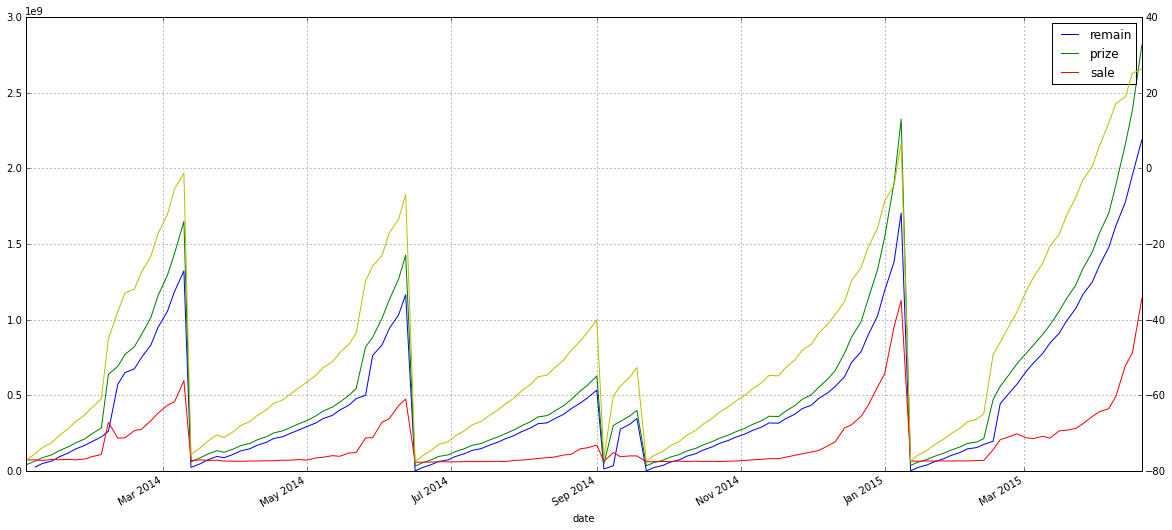

In [20]:
# 上次剩餘金額 與 這次購買金額 和 總金額 的關係
import matplotlib as mpl
fig = plt.figure()
mpl.rc('figure', figsize=(20, 9))
ndf[['remain','prize','sale']].plot()
(ndf.exp-100).plot(secondary_y= True, color = 'Y')

###上次剩餘獎金 + 這次銷售金額 - 這次的總獎金 = 彩卷行收入 + 公益 + 成本

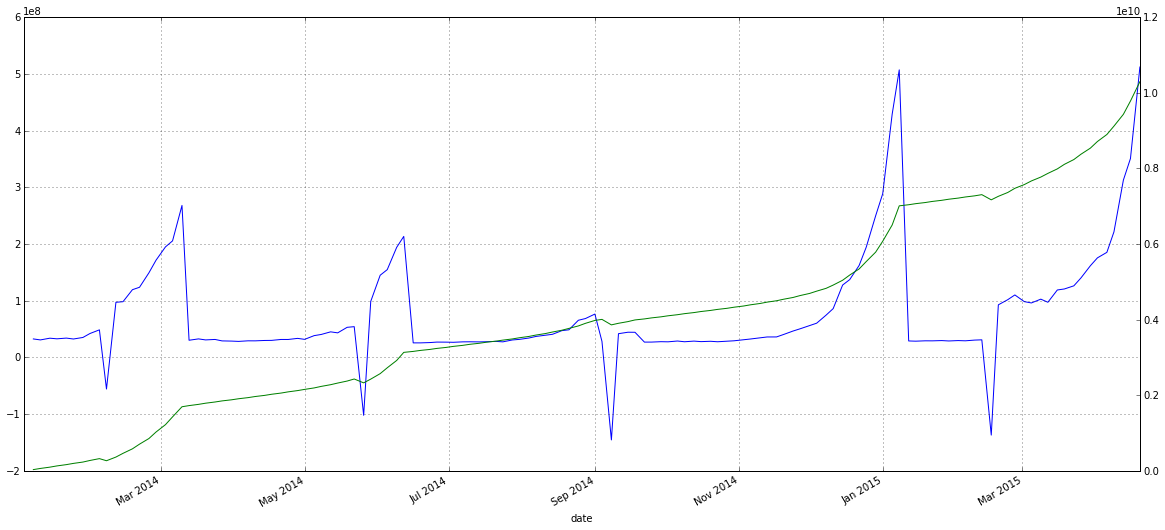

In [34]:
(ndf.remain + ndf.sale - ndf.prize).plot()
#綠線是整體營收看右邊Y軸
(ndf.remain + ndf.sale - ndf.prize).cumsum().plot(secondary_y = True)

#威力彩期望值

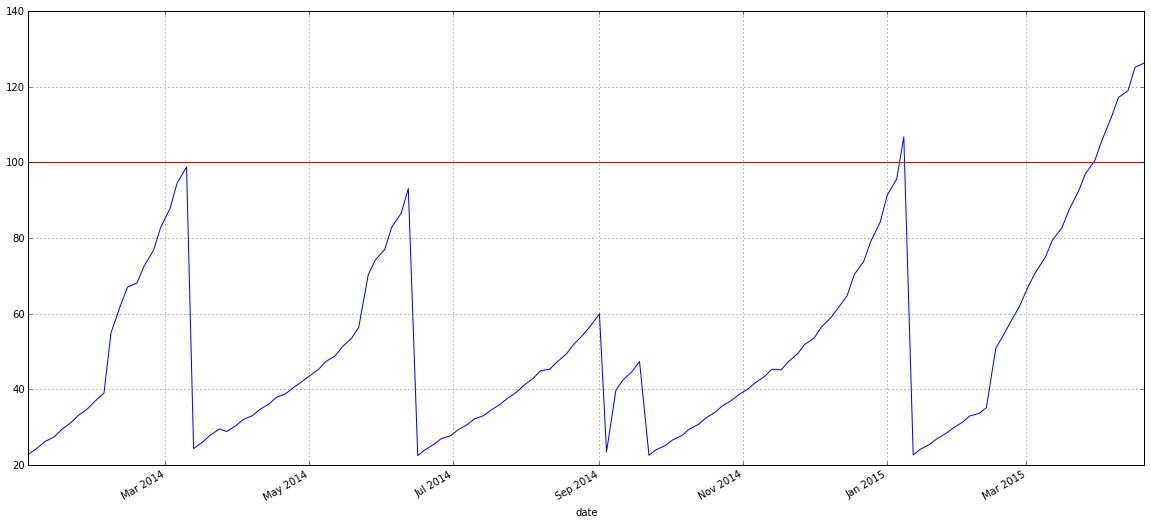

In [21]:
ndf.exp.plot()
a=ndf
a['reference'] = 100
a.reference.plot(color='r')


###特別號次數分配

2    24
8    22
5    21
1    19
6    18
7    12
4    10
3    10
dtype: int64

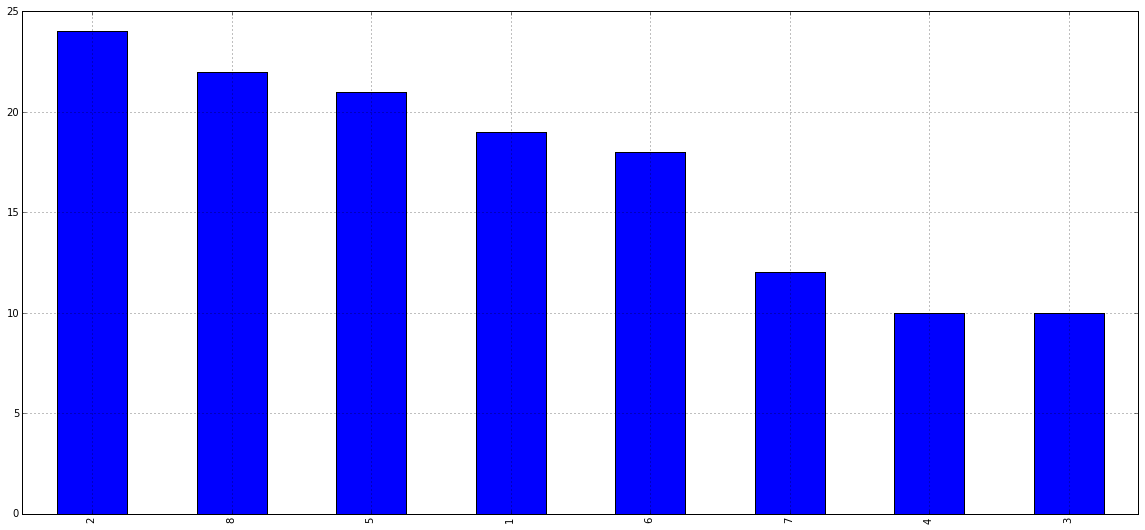

In [22]:
df.special.value_counts().plot(kind='bar')
df.special.value_counts()

In [23]:
ndf['delta'] = ndf.remain + ndf.sale - ndf.prize

In [24]:
# list some of the highest expected values
ndf.sort_index(by='exp',ascending=False).head()

,remain,sale,prize,people,exp,reference,delta
date,,,,,,,
2015-04-20,2188444331,1138273300,2814494646,11382733,126.340697,100,512222985
2015-04-16,1956520825,779704200,2385358135,7797042,125.157503,100,350866890
2015-04-13,1776060473,695149900,2158392918,6951499,118.934868,100,312817455
2015-04-09,1620904729,492201900,1891615774,4922019,117.202658,100,221490855
2015-04-06,1477926605,411863500,1704451530,4118635,112.020565,100,185338575


In [25]:
(ndf.exp-100).describe()

count    136.000000
mean     -48.164014
std       25.676308
min      -77.559533
25%      -68.192702
50%      -55.870787
75%      -32.318355
max       26.340697
Name: exp, dtype: float64

In [26]:
# 把所有數字的抽到次數算出來
l = []
for i in range(1,7):
    l.extend(df[str(i)].tolist())
l.extend(df['special'].tolist())

###第一區次數分配表

AVG =  21
8     51
1     47
5     45
2     42
4     36
6     35
37    29
10    28
36    27
26    26
dtype: int64


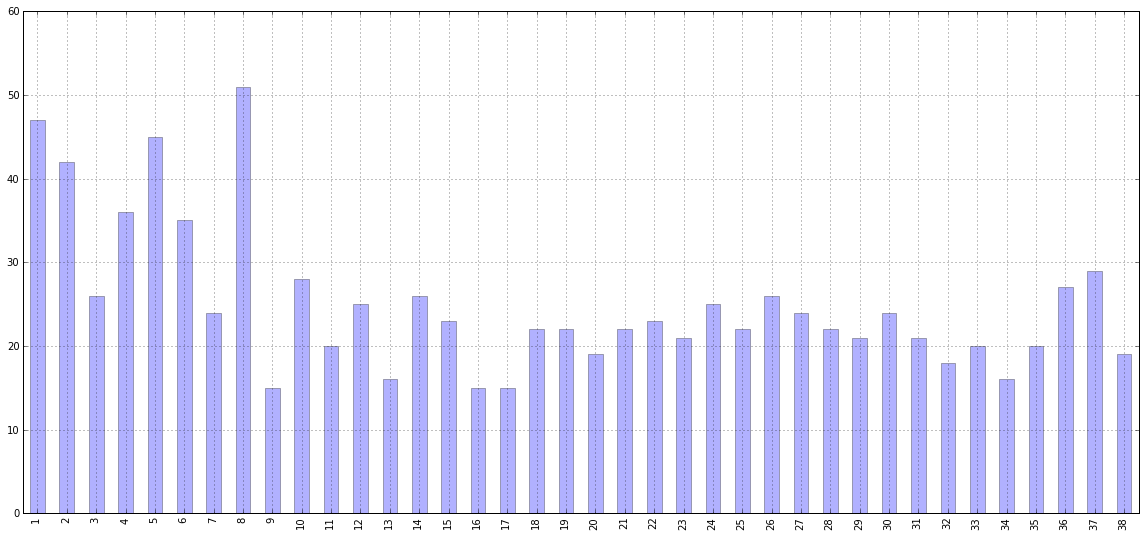

In [27]:
s = pd.Series(l)
print 'AVG = ',len(df) * 6 /38
print s.value_counts().head(10)
s.value_counts().sort_index().plot(kind='bar',alpha=0.3)
#average times that each number will be drawed is 20